**Question 1**

In [ ]:
#Imported Modules
import pandas as pd 
import numpy as np
import statistics 
import matplotlib.pyplot as plt

data = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx', header =0)
#Intial look at the data
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [ ]:
#Reproducing naive AOV calculation: 
naive_AOV = np.sum(data['order_amount'])/len(data)
print('Naive AOV is =', naive_AOV)

Naive AOV is = 3145.128


From the first 5 rows of data, it is clear that while all the shops are selling the same item (sneaker), they are not sold at the same price. For example, at shop ID 92 the sneaker is sold at 90 whereas at ID 44 its sold at 144. This is the first area, I will look at to figure out what is going wrong with the calculation

Text(0, 0.5, 'Price')

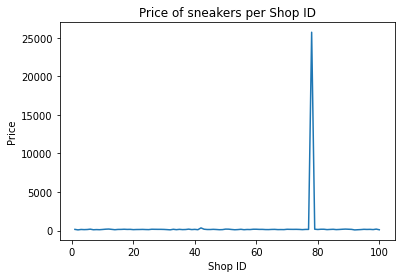

In [ ]:
price_per_shop = []
shop_id = []
#Price of same sneaker different in each shop
for i in range(101):
    for j in range(len(data)):        
        if i == data['shop_id'][j]:
            price_per_shop.append(data['order_amount'][j]/data['total_items'][j])
            shop_id.append(i)
            break
plt.plot(shop_id, price_per_shop)
plt.title('Price of sneakers per Shop ID')
plt.xlabel('Shop ID')
plt.ylabel('Price')

As provided in the instructions, the prices of sneakers are mostly relatively affordable (Price = 153). Therefore, there is an outlier - one of the Shop_IDs has a very high unit (sneaker) price which could be one of the reasons to skew the AOV

In [ ]:
print('Most common sneaker price =', statistics.mode(price_per_shop))
print('Shop_ID of outlier =',price_per_shop.index(max(price_per_shop))+1)
print('Average sneaker price BEFORE removing outlier =',round(np.mean(price_per_shop)))
print('Average sneaker price AFTER removing outlier =',round(np.sum(price_per_shop[:77]+price_per_shop[78:])/100))

Most common sneaker price = 153.0
Shop_ID of outlier = 78
Average sneaker price BEFORE removing outlier = 408
Average sneaker price AFTER removing outlier = 151


In [ ]:
#Would removing the outlier (Shop ID 78, fix the AOV?)
order_amt = []
#Removing shop_id 78 from AOV calc
for i in range(len(data)):
    if data['shop_id'][i] != 78:
        order_amt.append(data['order_amount'][i])
print('AOV_1 =',round(np.mean(order_amt)))     

AOV_1 = 2717


While, the AOV_1 is lower than the intial naive AOV calculation of 3145 there is still something wrong which is spiking the AOV. Below is a histrogram of all the orders to get a picture

Mode value of all the orders = 153
Median value of all the orders = 284.0
Maximum value of all the orders = 704000


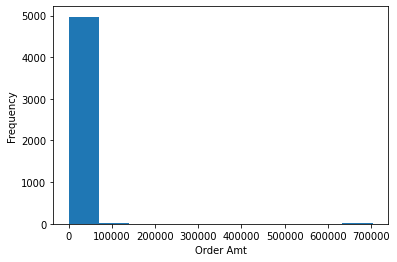

In [ ]:
plt.hist(data['order_amount'])
plt.xlabel('Order Amt')
plt.ylabel('Frequency')
print('Mode value of all the orders =', statistics.mode(data['order_amount']))
print('Median value of all the orders =', statistics.median(data['order_amount']))
print('Maximum value of all the orders =', max(data['order_amount']))

While the highest frequency of orders had an amoutn of 153, couple of orders had a value of 704000 which skewed the AOV. While, other than including the shop_ID 78 having an outlier per unit price of a sneaker, the calculation for AOV was correct. For the purposes of understanding how much revenue each 'typical' order makes - a better way evaluating this would be the Mode. This would be the order value most frequently observed which describes a 'typical' order. Therefore, the calculated Mode of the all the shops, over the last 30 days is shown below:

In [ ]:
print('Mode value of all the orders =', statistics.mode(data['order_amount']))

Mode value of all the orders = 153


**QUESTION 2**

a. SELECT count(OrderID) FROM [Orders] where ShipperID = 1

54 orders were shipped with Speedy Express. From the 'Shippers' table, ShiperID = 1 = Speedy Express. 

b. 
SELECT EmployeeID, COUNT(EmployeeID) AS Freq
FROM [Orders]
GROUP BY EmployeeID
ORDER BY COUNT(EmployeeID)DESC

Employee ID 4 had the most orders who's last name is Peacock


c. SELECT CustomerID FROM [Customers] where Country == 'Germany'


SELECT o.CustomerID FROM [Orders] AS o
where (SELECT c.CustomerID FROM [Customers] AS c where c.Country == 'Germany') == o.CustomerID